<h3>The Battle of the Neighborhoods - Week 2 </h3>

<b>In Part 1, Restaurants of Borough of New York City in neighbourhood of Bronx, Queens and Staten Island was explored. Foursquare API was used to get Restaurant Venue and Url:'https://cocl.us/new_york_dataset' to get location of each neighbourhood. Saturated Market and Untapped Market was checked in the neighbourhood by doing clustering and visualising the neighbourhood in Map. </b>
    
<b>In Part 2, Popular cuisine of Borough of New York City in neighbourhood of Manhattan, Brooklyn, Bronx was explored by Web Scrapping of Wikipedia Page and visualising popular cuisines by Word Cloud. </b>


Install libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
# !conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.1.0
Wordcloud is installed and imported!


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
import json

<h3>Part 1</h3>

Load and explore data

In [4]:
!wget https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


--2019-11-30 20:04:03--  https://cocl.us/new_york_dataset
Resolving cocl.us... 161.202.50.39
Connecting to cocl.us|161.202.50.39|:443... connected.
Unable to establish SSL connection.


In [5]:
import requests

url = 'https://cocl.us/new_york_dataset'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

newyork_data = requests.get(url, headers=headers)

In [6]:
newyork_data.json()

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [7]:
#type(newyork_data.json())
neighborhoods_data = newyork_data.json()['features']

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [10]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [11]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [12]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [14]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [15]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

<b>Explore Neighborhoods in Bronx, Queens and Staten Island</b>


In [16]:
BQS_Geo = neighborhoods.loc[(neighborhoods['Borough'] == 'Bronx')|(neighborhoods['Borough'] == 'Queens')|(neighborhoods['Borough'] == 'Staten Island')]
BQS_Geo = BQS_Geo.reset_index(drop=True)
BQS_Geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [17]:
BQS_Geo.shape

(196, 4)

<b>Create a map of Bronx, Queens and Staten Island with neighborhoods superimposed on top.</b>



In [18]:
# create map of Toronto using latitude and longitude values
map_BQS = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(BQS_Geo['Latitude'], BQS_Geo['Longitude'], BQS_Geo['Borough'], BQS_Geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BQS)  
    
map_BQS

<b>Define Foursquare Credentials and Version</b>



In [19]:
CLIENT_ID = 'TKJKOR5BJCNI2XCNKPLSHNQYPTVL3L30OR3BYSJRYV4VGCMX' # your Foursquare ID
CLIENT_SECRET = 'DWC2NXL5ENBJYZVM3CNK0YRNC2CPAYHZI4HM3X0QD0E5OUW5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TKJKOR5BJCNI2XCNKPLSHNQYPTVL3L30OR3BYSJRYV4VGCMX
CLIENT_SECRET:DWC2NXL5ENBJYZVM3CNK0YRNC2CPAYHZI4HM3X0QD0E5OUW5


<b>With the above function we can Extract Venues data for each neighborhoods in Bronx, Queens and Staten Island and create new dataframe called BQS_venues.</b>



In [20]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
BQS_venues = getNearbyVenues(names=BQS_Geo['Neighborhood'],
                                  latitudes=BQS_Geo['Latitude'],
                                  longitudes=BQS_Geo['Longitude'],
                                  LIMIT=200)

print('The "BQS_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(BQS_venues['Venue Category']),
      len(BQS_venues['Venue Category'].unique())))

BQS_venues.to_csv('BQS_venues.csv', sep=',', encoding='UTF8')
BQS_venues.head()

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cam

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
3,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant


<b>Download data from Brooklyn_venues.csv</b>

In [22]:
colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
BQS_venues = pd.read_csv('BQS_venues.csv', skiprows=1, names=colnames)
BQS_venues.columns = BQS_venues.columns.str.replace(' ', '')
BQS_venues.head()

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
3,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant


<b>BQS_Venues data</b>



In [23]:
BQS_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

VenueCategory
Pizza Place                                 638
Deli / Bodega                               354
Donut Shop                                  342
Italian Restaurant                          288
Pharmacy                                    282
Sandwich Place                              279
Chinese Restaurant                          261
Bank                                        239
Bakery                                      217
Supermarket                                 215
Fast Food Restaurant                        212
Coffee Shop                                 201
Park                                        199
Bar                                         195
Grocery Store                               188
Mexican Restaurant                          187
Ice Cream Shop                              173
Diner                                       167
Bus Stop                                    151
Discount Store                              136
American Restaurant       

<b>Number of venues that were returned for each neighborhood</b>



In [24]:
BQS_venues.groupby('Neighborhood').count()

,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Allerton,57,57,57,57,57,57
Annadale,14,14,14,14,14,14
Arden Heights,20,20,20,20,20,20
Arlington,23,23,23,23,23,23
Arrochar,25,25,25,25,25,25
Arverne,32,32,32,32,32,32
Astoria,100,100,100,100,100,100
Astoria Heights,75,75,75,75,75,75
Auburndale,100,100,100,100,100,100


<b>Number of unique categories can be curated from all the returned venues</b>

In [25]:
print('There are {} uniques categories.'.format(len(BQS_venues['VenueCategory'].unique())))


There are 394 uniques categories.


<b>Analysing the neighbourhood of Bronx, Queens and Staten Island</b>

In [27]:
# one hot encoding
BQS_onehot = pd.get_dummies(BQS_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(BQS_onehot.columns)

# add neighborhood column back to dataframe
BQS_onehot['Neighborhood'] = BQS_venues['Neighborhood'] 

# move neighborhood column to the first column
BQS_onehot = BQS_onehot[column_names]

BQS_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Carpet Store,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Gym,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Paella Restaurant,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke P

In [28]:
restaurant_List1 = []
search = 'Restaurant'
for i in BQS_onehot.columns :
    if search in i:
        restaurant_List1.append(i)

In [29]:
restaurant_List1

['Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Brazilian Restaurant',
 'Cajun / Creole Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Egyptian Restaurant',
 'Empanada Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Himalayan Restaurant',
 'Hotpot Restaurant',
 'Indian Restaurant',
 'Indonesian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Kosher Restaurant',
 'Latin American Restaurant',
 'Malay Restaurant',
 'Mediterranean Restaurant',
 'Mexican R

In [30]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List1
BQS_restaurant = BQS_onehot[col_name]
BQS_restaurant = BQS_restaurant.iloc[:,1::]

In [32]:
BQS_restaurant_grouped = BQS_restaurant.groupby('Neighborhood').sum().reset_index()

In [33]:
BQS_restaurant_grouped['Total'] = BQS_restaurant_grouped .sum(axis=1)

<b>Cluster Neighborhoods and Examine Clusters</b>


First, let's determine the optimal value of K for our dataset using the Silhouette Coefficient Method



In [41]:
from sklearn.metrics import silhouette_score

In [42]:
BQS_grouped_clustering = BQS_restaurant_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(BQS_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(BQS_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5206884460224669
For n_clusters=3, The Silhouette Coefficient is 0.4485415505479001
For n_clusters=4, The Silhouette Coefficient is 0.3493029907679021
For n_clusters=5, The Silhouette Coefficient is 0.32957633869206315
For n_clusters=6, The Silhouette Coefficient is 0.33400094664451224
For n_clusters=7, The Silhouette Coefficient is 0.29995923502208716
For n_clusters=8, The Silhouette Coefficient is 0.29619605357647516
For n_clusters=9, The Silhouette Coefficient is 0.2992323498492157


<b>As we can see, n_clusters=2 has highest Silhouette Coefficient. This means that 2 should be the optimal number of clusters.
For n_clusters=2, The Silhouette Coefficient is 0.5206884460224669

Run k-means to cluster the neighborhood into 2 clusters.</b>

In [56]:
BQS_grouped_clustering.shape

(194, 74)

In [47]:
# set number of clusters
kclusters = 2

BQS_grouped_clustering = BQS_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BQS_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [55]:
len(kmeans.labels_)

194

In [57]:
BQS_results = pd.DataFrame(kmeans.cluster_centers_)
BQS_results.columns = BQS_grouped_clustering.columns
BQS_results.index = ['cluster0','cluster1']
BQS_results['Total Sum'] = BQS_results.sum(axis = 1)
BQS_results

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern Greek Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Total,Total Sum
cluster0,0.006667,0.020000,0.513333,0.026667,1.387779e-16,0.220000,1.040834e-17,0.013333,0.020000,0.006667,0.573333,1.086667,0.013333,0.013333,0.006667,1.040834e-17,0.020000,0.013333,0.053333,1.040834e-17,0.013333,0.020000,1.046667,0.026667,0.013333,0.033333,6.666667e-03,0.086667,0.026667,1.040834e-17,8.673617e-17,8.673617e-17,0.206667,4.336809e-17,1.166667,0.246667,0.040000,4.336809e-17,0.286667,0.006667,0.066667,0.513333,0.100000,1.040834e-17,0.040000,0.013333,1.333333e-02,1.040834e-17,0.066667,1.040834e-17,6.666667e-03,6.245005e-17,0.360000,6.666667e-03,4.336809e-17,0.180000,2.081668e-17,0.006667,0.060000,0.046667,0.333333,0.026667,0.266667,4.163336e-17,0.013333,0.040000,1.333333e-02,0.140000,0.006667,8.673617e-17,1.249001e-16,0.080000,0.033333,8.266667,16.533333
cluster1,0.068182,0.045455,1.318182,0.181818,2.500000e-01,0.840909,2.272727e-02,0.159091,0.113636,0.181818,0.522727,2.227273,0.068182,0.045455,0.090909,2.272727e-02,0.136364,0.204545,0.181818,2.272727e-02,0.136364,0.022727,1.250000,0.204545,0.159091,0.022727,-3.469447e-18,0.795455,0.090909,2.272727e-02,1.363636e-01,1.363636e-01,1.181818,6.818182e-02,2.568182,0.954545,1.522727,6.818182e-02,1.409091,0.045455,0.272727,2.500000,0.318182,2.272727e-02,0.136364,0.022727,-6.938894e-18,2.272727e-02,0.522727,2.272727e-02,-3.469447e-18,1.590909e-01,0.613636,-3.469447e-18,6.818182e-02,0.590909,4.545455e-02,0.181818,0.568182,0.181818,0.727273,0.068182,1.068182,9.090909e-02,0.022727,0.113636,-6.938894e-18,1.045455,0.022727,1.363636e-01,2.272727e-01,0.204545,0.386364,27.863636,55.727273


The Total and Total Sum of cluster0 has smallest value. It shows that the market is not saturated.



Dataframe with Neighborhood,Cluster No and Total Sum

In [58]:
BQS_results_merged = pd.DataFrame(BQS_restaurant_grouped['Neighborhood'],)

BQS_results_merged['Total'] = BQS_restaurant_grouped['Total']
BQS_results_merged = BQS_results_merged.assign(Cluster_Labels = kmeans.labels_)

In [60]:
BQS_results_merged.head()

,Neighborhood,Total,Cluster_Labels
0,Allerton,10,0
1,Annadale,3,0
2,Arden Heights,4,0
3,Arlington,3,0
4,Arrochar,4,0


Merge BQS_results_merged with BQS_Geo



In [61]:
BQS_merged = BQS_Geo

BQS_merged = BQS_merged.join(BQS_results_merged.set_index('Neighborhood'), on='Neighborhood')

In [62]:
BQS_merged.head(10)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Bronx,Wakefield,40.894705,-73.847201,9,0
1,Bronx,Co-op City,40.874294,-73.829939,14,0
2,Bronx,Eastchester,40.887556,-73.827806,13,0
3,Bronx,Fieldston,40.895437,-73.905643,8,0
4,Bronx,Riverdale,40.890834,-73.912585,10,0
5,Bronx,Kingsbridge,40.881687,-73.902818,21,1
6,Bronx,Woodlawn,40.898273,-73.867315,8,0
7,Bronx,Norwood,40.877224,-73.879391,16,0
8,Bronx,Williamsbridge,40.881039,-73.857446,16,0
9,Bronx,Baychester,40.866858,-73.835798,14,0


Visualise Cluster

In [63]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BQS_merged['Latitude'], BQS_merged['Longitude'], BQS_merged['Neighborhood'], BQS_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b>Cluster 1 : Saturated Market in neighbourhood of New York City - Bronx, Queens and Staten Island</b>

In [65]:
BQS_merged[BQS_merged['Cluster_Labels'] == 1].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Bronx,Kingsbridge,40.881687,-73.902818,21,1
1,Bronx,Fordham,40.860997,-73.896427,24,1
2,Bronx,Melrose,40.819754,-73.909422,21,1
3,Bronx,Longwood,40.815099,-73.895788,20,1
4,Bronx,Parkchester,40.837938,-73.856003,26,1
5,Bronx,Morris Park,40.847549,-73.850402,20,1
6,Bronx,Belmont,40.857277,-73.888452,24,1
7,Bronx,Unionport,40.829774,-73.850535,20,1
8,Queens,Astoria,40.768509,-73.915654,30,1
9,Queens,Woodside,40.746349,-73.901842,44,1


<b>Cluster 0 : Untapped Market in neighbourhood of New York City - Bronx, Queens and Staten Island</b>

In [67]:
BQS_merged[BQS_merged['Total'] == 0].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Bronx,Clason Point,40.806551,-73.854144,0,0
1,Staten Island,Todt Hill,40.597069,-74.111329,0,0
2,Staten Island,South Beach,40.580247,-74.079553,0,0
3,Staten Island,Port Ivory,40.639683,-74.174645,0,0
4,Staten Island,Butler Manor,40.506082,-74.229504,0,0
5,Staten Island,Rossville,40.549404,-74.215729,0,0
6,Staten Island,Bloomfield,40.605779,-74.187256,0,0


<h3> Part 2 </h3> 

Get Data 
Get HTML from wikipedia of cuisine of neighbourhood of Manhattan
Use BeautifySoup to parse html data
Store parsed data into Pandas DataFrame

In [458]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

#get html from wiki page and create soup object
source = requests.get("https://en.wikipedia.org/wiki/Cuisine_of_New_York_City")

In [459]:
soup = BeautifulSoup(source.text, 'lxml')

In [497]:
# soup.find(class_='wikitable')
# print soup.find(text="Address:").findNext('td').contents[0]
man_content = soup.find("span", {"id": "Manhattan"}).parent.findNext('div').contents[1]
bronx_content = soup.find("span", {"id": "The_Bronx"}).parent.findNext('div').contents[1]
brooklyn_content = soup.find("span", {"id": "Brooklyn"}).parent.findNext('div').contents[1]

In [498]:
man_nei = list()
bronx_nei = list()
brooklyn_nei = list()

for a in man_content.findAll('a'):
    man_nei.append(a.contents[0])
man_nei.remove("Italian")    
print("man_nei:", man_nei)

for a in bronx_content.findAll('a'):
    bronx_nei.append(a.contents[0])
print("bronx_nei:", bronx_nei)

for a in brooklyn_content.findAll('a'):
    brooklyn_nei.append(a.contents[0])
print("brooklyn_nei:", brooklyn_nei)

man_nei: ['Chinatown', 'East Harlem', 'East Village', 'Greenwich Village', 'Harlem', 'Koreatown', 'Nolita', 'Little Italy', 'Lower East Side', 'Murray Hill', 'Upper West Side, Manhattan', 'Washington Heights', 'Upper East Side']
bronx_nei: ['Bedford Park', 'Belmont', 'City Island', 'Morris Park', 'Norwood', 'Riverdale', 'South Bronx', 'Wakefield', 'Woodlawn']
brooklyn_nei: ['Bay Ridge', 'Bedford-Stuyvesant', 'Bensonhurst', 'Borough Park', 'Brighton Beach', 'Bushwick', 'Canarsie', 'Carroll Gardens', 'Crown Heights', 'East New York', 'Flatbush', 'Greenpoint', 'Kensington', 'Midwood', 'Park Slope', 'Red Hook', 'Sheepshead Bay', 'Sunset Park', 'Williamsburg']


In [500]:
man_cuis = list()
bronx_cuis = list()
queens_cuis = list()
brooklyn_cuis = list()
staten_island_li_cuis = list()

man_data = str(man_content)
man_soup = BeautifulSoup(man_data,'html.parser')
man_li_tag=man_soup('li')

bronx_data = str(bronx_content)
bronx_soup = BeautifulSoup(bronx_data,'html.parser')
bronx_li_tag=bronx_soup('li')

brooklyn_data = str(brooklyn_content)
brooklyn_soup = BeautifulSoup(brooklyn_data,'html.parser')
brooklyn_li_tag=brooklyn_soup('li')

staten_island_data = str(staten_island_content)
staten_island_soup = BeautifulSoup(staten_island_data,'html.parser')
staten_island_li_tag=staten_island_soup('li')

for tag in man_li_tag:
    lr = str(tag.contents[1]).lstrip().lstrip("–").lstrip("-").lstrip().rstrip()
    lr = lr.replace("and",",")
    lr = lr.rstrip(",")
    man_cuis.append(lr)     #.contents method to locate text within <a> tags
print("man_cuis:",man_cuis)

for tag in bronx_li_tag:
    lr = str(tag.contents[1]).lstrip().lstrip("–").lstrip("-").lstrip().rstrip()
    lr = lr.replace("and",",")
    lr = lr.rstrip(",")
    bronx_cuis.append(lr)     #.contents method to locate text within <a> tags
print("bronx_cuis:",bronx_cuis)

for tag in brooklyn_li_tag:
    lr = str(tag.contents[1]).lstrip().lstrip("–").lstrip("-").lstrip().rstrip().lstrip(";").lstrip().lstrip("–")
    lr = lr.replace("and",",")
    lr = lr.rstrip(",")
    brooklyn_cuis.append(lr)     #.contents method to locate text within <a> tags
print("brooklyn_cuis:",brooklyn_cuis)

for tag in staten_island_li_tag:
    lr = str(tag.contents[1]).lstrip().lstrip("–").lstrip("-").lstrip().rstrip()
    lr = lr.replace("and",",")
    lr = lr.rstrip(",")
    staten_island_li_cuis.append(lr)     #.contents method to locate text within <a> tags
print("staten_island_li_cuis:",staten_island_li_cuis)

man_cuis: ['Chinese , Vietnamese', 'Puerto Rican, Mexican, Dominican, Chinese-Cuban ', 'Japanese, Korean, Indian , Ukrainian', 'Italian , Middle Eastern', 'Italian, African-American, Latin American, West Indian, , West African', 'Korean', 'Australian', 'Italian', 'Puerto Rican, Jewish, Italian, , Latin American', 'Indian, Pakistani , Bangladeshi', 'Jewish, Chinese-Latino', 'Dominican, Puerto Rican, Italian , Jewish', 'German, Czech, Hungarian']
bronx_cuis: ['Mexican, Puerto Rican, Dominican, Korean (on 204th St.)', 'Italian, Albanian (also known as "Arthur Avenue," "Little Italy")', 'Italian, Seafood', 'Italian, Albanian', 'Filipino (formerly Irish, less so today)', 'Jewish', 'Puerto Rican, Dominican', 'Jamaican, West Indian', 'Irish']
brooklyn_cuis: ['Irish, Italian, Greek, Turkish, Lebanese, Palestinian, Yemeni , other Arabic', 'African-American, Jamaican, Trinidadian, Puerto Rican , West Indian', ' Italian, Chinese, Turkish, Russian, Mexican, Uzbek', 'Jewish, Italian, Mexican, Chine

In [501]:
import pandas as pd
df_Manhattan = pd.DataFrame(man_cuis,man_nei) 
df_Manhattan.loc[:,'Borough'] = 'Manhattan'
df_Manhattan.columns = ['Cuisines','Borough'] 
df_Manhattan.index.name ='Neighbourhood'
df_Manhattan = df_Manhattan.reset_index()
cols = df_Manhattan.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_Manhattan = df_Manhattan[cols]
df_Manhattan.head()

,Borough,Neighbourhood,Cuisines
0,Manhattan,Chinatown,"Chinese , Vietnamese"
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cuban"
2,Manhattan,East Village,"Japanese, Korean, Indian , Ukrainian"
3,Manhattan,Greenwich Village,"Italian , Middle Eastern"
4,Manhattan,Harlem,"Italian, African-American, Latin American, Wes..."


In [502]:
df_bronx = pd.DataFrame(bronx_cuis,bronx_nei) 
df_bronx.loc[:,'Borough'] = 'The Bronx'
df_bronx.columns = ['Cuisines','Borough'] 
df_bronx.index.name ='Neighbourhood'
df_bronx = df_bronx.reset_index()
cols = df_bronx.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_bronx = df_bronx[cols]
df_bronx.head()

,Borough,Neighbourhood,Cuisines
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean (on 2..."
1,The Bronx,Belmont,"Italian, Albanian (also known as ""Arthur Avenu..."
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,"Filipino (formerly Irish, less so today)"


In [503]:
df_brooklyn = pd.DataFrame(brooklyn_cuis,brooklyn_nei) 
df_brooklyn.loc[:,'Borough'] = 'Brooklyn'
df_brooklyn.columns = ['Cuisines','Borough'] 
df_brooklyn.index.name ='Neighbourhood'
df_brooklyn = df_brooklyn.reset_index()
cols = df_brooklyn.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_brooklyn = df_brooklyn[cols]
df_brooklyn.head()

,Borough,Neighbourhood,Cuisines
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, ..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani , Ukrainian"


<b>Cuisine of New York City</b>

In [508]:
df_New_York = pd.concat([df_Manhattan, df_bronx, df_brooklyn], ignore_index=True)

In [509]:
df_New_York

,Borough,Neighbourhood,Cuisines
0,Manhattan,Chinatown,"Chinese , Vietnamese"
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese-Cuban"
2,Manhattan,East Village,"Japanese, Korean, Indian , Ukrainian"
3,Manhattan,Greenwich Village,"Italian , Middle Eastern"
4,Manhattan,Harlem,"Italian, African-American, Latin American, Wes..."
5,Manhattan,Koreatown,Korean
6,Manhattan,Nolita,Australian
7,Manhattan,Little Italy,Italian
8,Manhattan,Lower East Side,"Puerto Rican, Jewish, Italian, , Latin American"
9,Manhattan,Murray Hill,"Indian, Pakistani , Bangladeshi"


In [535]:
# df_New_York[df_New_York.columns[Borough] == "Manhattan"]
# df_New_York[df_New_York.columns == "Borough"]
df_Manhattan_Cuisine = df_New_York.loc[df_New_York.Borough == "Manhattan"]["Cuisines"]
df_Bronx_Cuisine = df_New_York.loc[df_New_York.Borough == "The Bronx"]["Cuisines"]
df_Brooklyn_Cuisine = df_New_York.loc[df_New_York.Borough == "Brooklyn"]["Cuisines"]

<b> Visualising by wordcloud to get popular cuisines of neighbourhood of borough of New York city </b> 

<b>Visualise Wordcloud of "Manhattan" Cuisines</b>

c:\program files\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


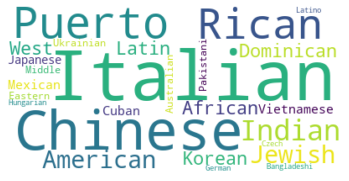

<Figure size 2160x3240 with 0 Axes>

In [534]:
df_Manhattan_Cuisine.to_csv('CUISINE_Manhattan_WC.txt', sep=',', index=False)
CUISINE_Manhattan_WC1 = open('CUISINE_Manhattan_WC.txt', 'r').read()
stopwords = set(STOPWORDS)

# instantiate a word cloud object
Manhattan_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Manhattan_CUISINE_WC.generate(CUISINE_Manhattan_WC1)

# display the word cloud
plt.imshow(Manhattan_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()


<b>Top 3 preferred cuisines of Manhattan</b>
<ol>
    <li>Italian</li>
    <li>Chinese</li>
    <li>Puerto Rican</li>
</ol>


<b>Visualise Wordcloud of "Brooklyn" Cuisines</b>

c:\program files\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


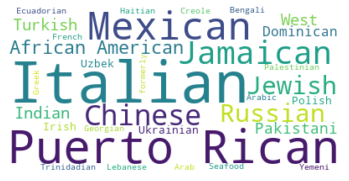

<Figure size 2160x3240 with 0 Axes>

In [536]:
df_Brooklyn_Cuisine.to_csv('CUISINE_Brooklyn_WC.txt', sep=',', index=False)
CUISINE_Brooklyn_WC1 = open('CUISINE_Brooklyn_WC.txt', 'r').read()
stopwords = set(STOPWORDS)

# instantiate a word cloud object
Brooklyn_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Brooklyn_CUISINE_WC.generate(CUISINE_Brooklyn_WC1)

# display the word cloud
plt.imshow(Brooklyn_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

<b>Top 3 preferred cuisines of Brooklyn</b>
<ol>
    <li>Italian</li>
    <li>Puerto Rican</li>
    <li>Mexican</li>
</ol>


<b>Visualise Wordcloud of "The Bronx" Cuisines</b>

c:\program files\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


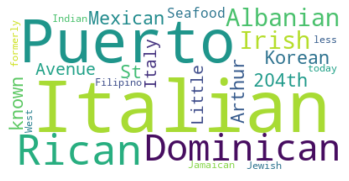

<Figure size 2160x3240 with 0 Axes>

In [537]:
df_Bronx_Cuisine.to_csv('CUISINE_Bronx_WC.txt', sep=',', index=False)
CUISINE_Bronx_WC1 = open('CUISINE_Bronx_WC.txt', 'r').read()
stopwords = set(STOPWORDS)

# instantiate a word cloud object
Bronx_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Bronx_CUISINE_WC.generate(CUISINE_Bronx_WC1)

# display the word cloud
plt.imshow(Bronx_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

<b>Top 3 preferred cuisines of The Bronx</b>
<ol>
    <li>Italian</li>
    <li>Puerto Rican</li>
    <li>Dominican</li>
</ol>